# Interpreting Transformed Regression Coefficients

## Introduction

When transformations are applied to the features in a linear regression, this has implications for the interpretation of the model coefficients.

## Objectives

You will be able to:

* Interpret the linear regression coefficient for a feature that has been log transformed
* Interpret the linear regression coefficient for a target that has been log transformed
* Interpret the linear regression coefficient for a feature that has been one-hot encoded

## Recall: Regression Coefficients in StatsModels

Before interpreting coefficients from transformed data, let's review a more basic StatsModels result.

### Baseline Data Preparation

Here we'll use the [Diamonds](https://www.kaggle.com/datasets/shivam2503/diamonds) dataset from Kaggle:

In [1]:
import pandas as pd
df = pd.read_csv("diamonds.csv", index_col=0)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


According to the documentation, the `depth` and `table` features are computed based on `x`, `y`, and `z`, so let's drop those in addition to selecting only numeric features for now.

In [2]:
y = df["price"]
X = df.drop(["price", "x", "y", "z"], axis=1).select_dtypes("number")

In [3]:
X.describe()

,carat,depth,table
count,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184
std,0.474011,1.432621,2.234491
min,0.200000,43.000000,43.000000
25%,0.400000,61.000000,56.000000
50%,0.700000,61.800000,57.000000
75%,1.040000,62.500000,59.000000
max,5.010000,79.000000,95.000000


### Building a Baseline Regression Model

The task is to predict the price of the diamond based on its other features. Let's build a multiple regression model with StatsModels!

In [4]:
import statsmodels.api as sm

# instantiate a model using un-transformed numeric features
baseline_model = sm.OLS(y, sm.add_constant(X))

# fit the model
baseline_results = baseline_model.fit()

# display the results
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 1.049e+05
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:07:05   Log-Likelihood:            -4.7194e+05
No. Observations:               53940   AIC:                         9.439e+05
Df Residuals:                   53936   BIC:                         9.439e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         1.3e+04    390.918     33.264      0.0

### Interpreting the Coefficients of a Baseline Regression Model

There is a lot of information in that result, but let's focus specifically on the `coef` column. That same data can be accessed using the `params` attribute of the results object:

In [5]:
baseline_results.params

const    13003.440524
carat     7858.770510
depth     -151.236347
table     -104.472780
dtype: float64

Here is how we can interpret those values. You can do this with looping code or just by looking at the values:

In [6]:
for key, value in baseline_results.params.iteritems():
    if key == "const":
        print(f"The intercept (when all other features are 0) is: ${value:,.2f}")
    else:
        if value < 0:
            direction = "decreases"
        else:
            direction = "increases"
        print(f"For each increase of 1 in {key}, the price {direction} by ${abs(value):,.2f}")

The intercept (when all other features are 0) is: $13,003.44
For each increase of 1 in carat, the price increases by $7,858.77
For each increase of 1 in depth, the price decreases by $151.24
For each increase of 1 in table, the price decreases by $104.47


## Regression Coefficients with Log Transformed Features

### Log Transformation of Features

One reason to log transform a feature is to try to make the feature more normally distributed. Let's investigate their current distributions:

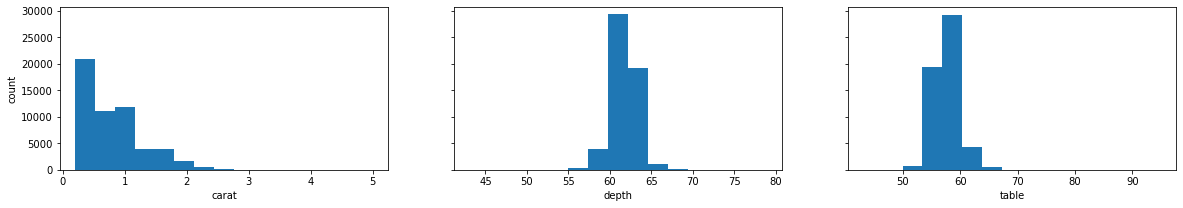

In [7]:
import matplotlib.pyplot as plt

def plot_feature_distributions(X):
    """
    Helper function that plots the distribution of each feature in X
    """
    fig, ax = plt.subplots(ncols=X.shape[1], figsize=(20, 3), sharey=True)
    
    ax[0].set_ylabel("count")

    for index, feature in enumerate(X):
        ax[index].hist(X[feature], bins=15)
        ax[index].set_xlabel(feature)
        
plot_feature_distributions(X)

Based on this, let's apply a log transformation to the `carat_points` feature, which is quite positively skewed:

In [8]:
import numpy as np

# Create a copy of X to apply transformations on
X_log_transformed = X.copy()
# Create a new column carat_log that contains log transformed data
X_log_transformed["carat_log"] = np.log(X_log_transformed["carat"])
# Drop original carat column
X_log_transformed.drop("carat", axis=1, inplace=True)
# Reset column order for easier comparison
X_log_transformed = X_log_transformed[["carat_log", "depth", "table"]]

X_log_transformed

,carat_log,depth,table
1,-1.469676,61.5,55.0
2,-1.560648,59.8,61.0
3,-1.469676,56.9,65.0
4,-1.237874,62.4,58.0
5,-1.171183,63.3,58.0
...,...,...,...
53936,-0.328504,60.8,57.0
53937,-0.328504,63.1,55.0
53938,-0.356675,62.8,60.0
53939,-0.150823,61.0,58.0


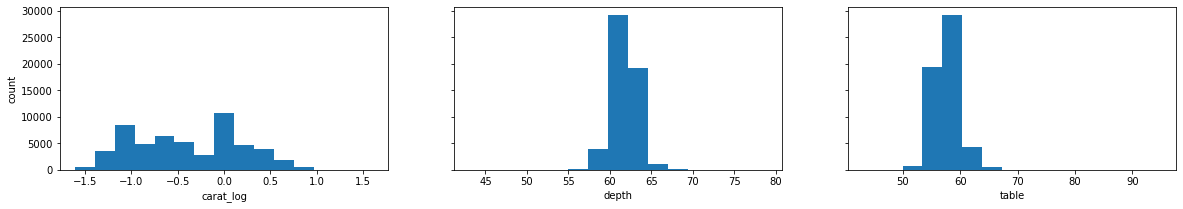

In [9]:
plot_feature_distributions(X_log_transformed)

That looks a bit better. `carat_points_log` is still not quite normally distributed, but it's less skewed.

### Building a Model with Log Transformed Features

Let's try fitting another model, this time using `X_log_transformed`:

In [10]:
# instantiate a model using X with log transformed feature
log_feature_model = sm.OLS(y, sm.add_constant(X_log_transformed))

# fit the model
log_feature_results = log_feature_model.fit()

# display the results
print(log_feature_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                 5.010e+04
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:07:08   Log-Likelihood:            -4.8787e+05
No. Observations:               53940   AIC:                         9.757e+05
Df Residuals:                   53936   BIC:                         9.758e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.108e+04    529.246     39.837      0.0

### Interpreting the Coefficients of a Model with Log Transformed Features

It's not actually clear that our log transformation actually improved the model performance overall, but let's go ahead and interpret the coefficients.

In [11]:
log_feature_results.params

const        21083.504922
carat_log     5919.048615
depth         -148.497224
table          -98.216810
dtype: float64

#### Interpreting Non-Transformed Features

For `const`, `depth`, and `table`, the interpretations are the same as without the log transformation. They are not the same _numbers_ because this is a different model, but the interpretation is the same. Here is the interpretation written out in text form this time:

* The intercept (when all other features are 0) is -&#36;21,083.50
* For each increase of 1 in `depth`, the `price` decreases by &#36;148.50
* For each increase of 1 in `table`, the `price` decreases by &#36;98.22

#### Why Our Previous Approach Won't Work for Log Transformed Features

For `carat_log`, the interpretation is a bit more complicated. It is technically correct to say *for each increase of 1 in the natural log of `carat`, the `price` increases by &#36;5,919.05* but that is not particularly meaningful. Even if you have the domain understanding to understand what "1 `carat`" means, it's unlikely that you can formulate a meaningful mental model of what "an increase of 1 in the natural log of `carat`" means.

#### Inverting the Log Transformation

The inverse of a logarithm is an exponent. So let's use the `exp` function from NumPy to transform our coefficient:

In [12]:
# Extract the coefficient from the model results
carat_log_coef = log_feature_results.params["carat_log"]
carat_log_coef

5919.0486153264865

In [13]:
np.exp([carat_log_coef])

<ipython-input-13-b36eff925cd2>:1: RuntimeWarning: overflow encountered in exp
  np.exp([carat_log_coef])


array([inf])